# Explore Session Groups with dataloader.py

This notebook demonstrates how to use `dataloader.py` to explore the data structure of samples in session groups.

In [1]:
# Section 1: Import Required Libraries and dataloader.py
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import json
import librosa
import cv2
from pathlib import Path

# Ensure dataloader.py and config are accessible
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('..'))
from dataloader import InteractionDataLoader
from config import SESSION_CONFIG

In [2]:
# Section 2: Initialize InteractionDataLoader
print(f"Using local_dir: {SESSION_CONFIG.local_dir}")
loader = InteractionDataLoader(config=SESSION_CONFIG)

2025-08-13 14:31:58,561 - INFO - Loaded filelist with 129572 entries


Using local_dir: /Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups


In [3]:
# Section 3: List Available File IDs in Session Groups
from pathlib import Path
import glob

PROJECT_ROOT = Path.cwd().parent
DATA_DIR = PROJECT_ROOT / 'data'
SESSION_GROUP_DIR = DATA_DIR / 'session_groups' / 'improvised' / 'dev' / '0000'

json_files = glob.glob(str(SESSION_GROUP_DIR / '*/' / '*.json'))
file_ids = [os.path.splitext(os.path.basename(f))[0] for f in json_files]
print(f"Found {len(file_ids)} file IDs:")
print(file_ids)

Found 10 file IDs:
['V00_S0809_I00000126_P0947', 'V00_S0700_I00000576_P0844A', 'V01_S1881_I00000186_P2767', 'V00_S0925_I00000488_P0816', 'V00_S0809_I00000785_P0383', 'V01_S0935_I00001226_P2040', 'V00_S1061_I00000160_P0383', 'V00_S0648_I00000382_P0801', 'V00_S2020_I00000679_P1276A', 'V00_S0696_I00000543_P0844A']


In [4]:
# Section 4: Load and Display Sample Interaction Data
from pathlib import Path

# Pick the first file for demonstration
sample_json_path = Path(json_files[0])
sample_file_id = sample_json_path.stem
print(f"Sample file path: {sample_json_path}")
print(f"Sample file ID: {sample_file_id}")

# Debug: Show what paths the loader finds
paths_found = loader.get_paths(sample_file_id)
print(f"Paths found by loader: {paths_found}")

# Load the interaction data
interaction = loader.load_interaction(sample_file_id)
print(f"Loaded modalities for {sample_file_id}:")
print(list(interaction.keys()))

Sample file path: /Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups/improvised/dev/0000/0032/V00_S0809_I00000126_P0947.json
Sample file ID: V00_S0809_I00000126_P0947
Paths found by loader: ['/Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups/improvised/dev/0000/0032/V00_S0809_I00000126_P0947.mp4', '/Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups/improvised/dev/0000/0032/V00_S0809_I00000126_P0947.json', '/Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups/improvised/dev/0000/0032/V00_S0809_I00000126_P0947.wav', '/Users/bloggerwang/Documents/Lab/seamless_interaction/data/session_groups/improvised/dev/0000/0032/V00_S0809_I00000126_P0947.npz']
Loaded modalities for V00_S0809_I00000126_P0947:
['video', 'json', 'audio', 'npz']
Loaded modalities for V00_S0809_I00000126_P0947:
['video', 'json', 'audio', 'npz']


In [5]:
# Section 5: Explore NPZ File Structure and Keys
if 'npz' in interaction:
    npz_data = interaction['npz']
    print("NPZ keys:", list(npz_data.keys()))
    for key in npz_data.keys():
        arr = npz_data[key]
        print(f"{key}: shape = {arr.shape}")
else:
    print("No NPZ data found in this sample.")

NPZ keys: ['boxes_and_keypoints:box', 'boxes_and_keypoints:is_valid_box', 'boxes_and_keypoints:keypoints', 'movement:EmotionArousalToken', 'movement:EmotionValenceToken', 'movement:FAUToken', 'movement:FAUValue', 'movement:alignment_head_rotation', 'movement:alignment_translation', 'movement:emotion_arousal', 'movement:emotion_scores', 'movement:emotion_valence', 'movement:expression', 'movement:frame_latent', 'movement:gaze_encodings', 'movement:head_encodings', 'movement:hypernet_features', 'movement:is_valid', 'smplh:body_pose', 'smplh:global_orient', 'smplh:is_valid', 'smplh:left_hand_pose', 'smplh:right_hand_pose', 'smplh:translation']
boxes_and_keypoints:box: shape = (6000, 4)
boxes_and_keypoints:is_valid_box: shape = (6000,)
boxes_and_keypoints:keypoints: shape = (6000, 133, 3)
movement:EmotionArousalToken: shape = (6000, 1)
movement:EmotionValenceToken: shape = (6000, 1)
movement:FAUToken: shape = (6000, 1)
movement:FAUValue: shape = (6000, 24)
movement:alignment_head_rotation:

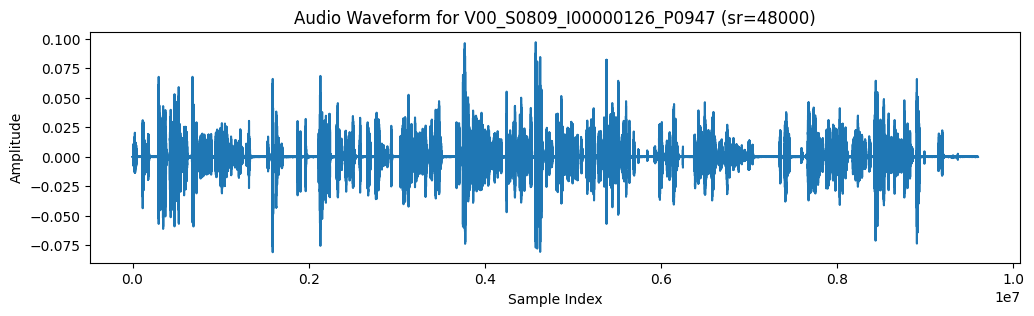

In [6]:
# Section 6: Visualize Audio Waveform
if 'audio' in interaction:
    audio_array = interaction['audio']['array']
    sr = interaction['audio']['sampling_rate']
    plt.figure(figsize=(12, 3))
    plt.plot(audio_array)
    plt.title(f"Audio Waveform for {sample_file_id} (sr={sr})")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()
else:
    print("No audio data found in this sample.")

In [7]:
# Section 7: Display JSON Metadata Sample
if 'json' in interaction:
    print("JSON metadata sample:")
    print(json.dumps(interaction['json'], indent=2)[:1000])  # Print first 1000 chars
else:
    print("No JSON metadata found in this sample.")

JSON metadata sample:
{
  "id": "V00_S0809_I00000126_P0947",
  "metadata:transcript": [
    {
      "words": [
        {
          "word": "All",
          "start": 0.24500000000000455,
          "end": 0.4249999999999545,
          "score": 0.818
        },
        {
          "word": "righty.",
          "start": 0.48500000000001364,
          "end": 0.9660000000000082,
          "score": 0.813
        }
      ],
      "start": 0.24500000000000455,
      "end": 0.9660000000000082,
      "transcript": "All righty."
    },
    {
      "words": [
        {
          "word": "I",
          "start": 2.4260000000000446,
          "end": 2.48599999999999,
          "score": 0.996
        },
        {
          "word": "do.",
          "start": 2.5259999999999536,
          "end": 2.7870000000000346,
          "score": 0.874
        }
      ],
      "start": 2.4260000000000446,
      "end": 2.7870000000000346,
      "transcript": "I do."
    },
    {
      "words": [
        {
          "wor